## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

# Clean & Analyze Social Media

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

In [8]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
n = 1000 # no. of data points
data = { 'Date': pd.date_range('2021-01-01', periods=n), 'Category': [random.choice(categories) for _ in range(n)], 'Likes': np.random.randint(0, 10000, size=n)}
# Printing the first 5 items for each key 
for key in data:
    print(f"{key}: {data[key][:5]} ... {data[key][-5:]}")

Date: DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', freq='D') ... DatetimeIndex(['2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26',
               '2023-09-27'],
              dtype='datetime64[ns]', freq='D')
Category: ['Health', 'Culture', 'Fashion', 'Culture', 'Fitness'] ... ['Travel', 'Fitness', 'Family', 'Fitness', 'Food']
Likes: [2299 6967 3206  493  452] ... [ 538 2918 5749 9608  716]


In [9]:
#creating & printing the dataframe
df = pd.DataFrame(data)
print(df)

          Date Category  Likes
0   2021-01-01   Health   2299
1   2021-01-02  Culture   6967
2   2021-01-03  Fashion   3206
3   2021-01-04  Culture    493
4   2021-01-05  Fitness    452
..         ...      ...    ...
995 2023-09-23   Travel    538
996 2023-09-24  Fitness   2918
997 2023-09-25   Family   5749
998 2023-09-26  Fitness   9608
999 2023-09-27     Food    716

[1000 rows x 3 columns]


In [11]:
# Print the details of the DataFrame
print('First 5 elements: \n',df.head())
print('\nInformation of dataframe:\n',df.info())
print('\nDescription of the DataFrame:\n',df.describe())
print("Count of each 'Category' element:\n",df['Category'].value_counts())

First 5 elements: 
         Date Category  Likes
0 2021-01-01   Health   2299
1 2021-01-02  Culture   6967
2 2021-01-03  Fashion   3206
3 2021-01-04  Culture    493
4 2021-01-05  Fitness    452
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.6+ KB

Information of dataframe:
 None

Description of the DataFrame:
              Likes
count  1000.000000
mean   4878.973000
std    2867.873953
min      17.000000
25%    2348.750000
50%    4792.000000
75%    7271.250000
max    9994.000000
Count of each 'Category' element:
 Fashion    145
Food       135
Family     133
Fitness    122
Health     121
Culture    120
Music      112
Travel     112
Name: Cate

In [12]:
#clean the data by removing all the null values & duplicates, then converting Dates to datetime format & likes to integer format
df = df.dropna()
df = df.drop_duplicates()
df['Date'] = pd.to_datetime(df['Date'])
df['Likes'] = df['Likes'].astype(int)
print(df)

          Date Category  Likes
0   2021-01-01   Health   2299
1   2021-01-02  Culture   6967
2   2021-01-03  Fashion   3206
3   2021-01-04  Culture    493
4   2021-01-05  Fitness    452
..         ...      ...    ...
995 2023-09-23   Travel    538
996 2023-09-24  Fitness   2918
997 2023-09-25   Family   5749
998 2023-09-26  Fitness   9608
999 2023-09-27     Food    716

[1000 rows x 3 columns]


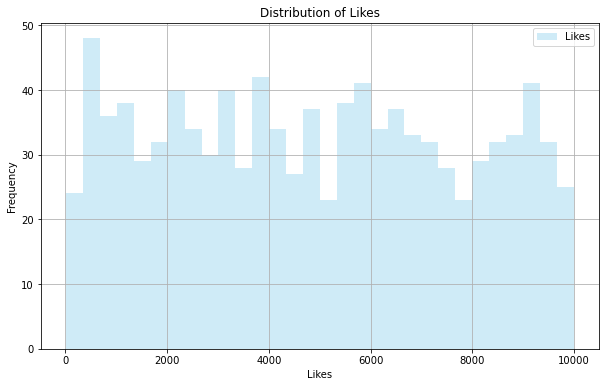

In [15]:
# Visualize the data as a histogram plot of the 'Likes'
plt.figure(figsize=(10, 6))
sns.distplot(df['Likes'], bins=30, color='skyblue', kde=False)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.grid(True)  # Add a grid
plt.legend(['Likes'])  # Add a legend
plt.show()

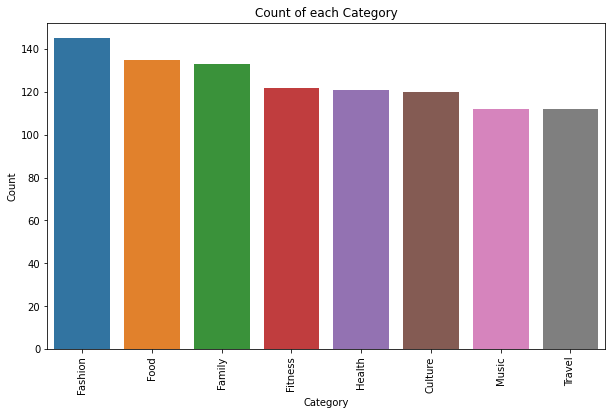

In [18]:
# Visualize the count of each 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Count of each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

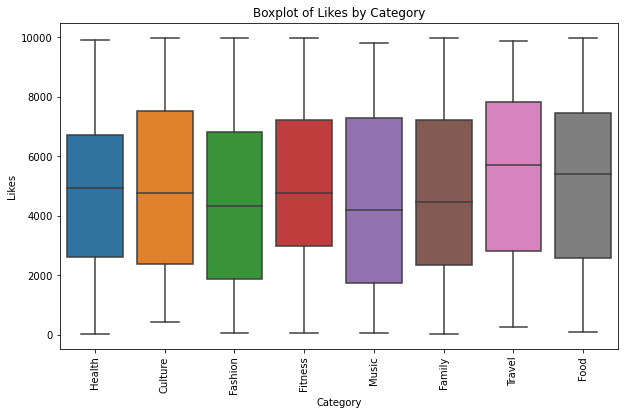

In [19]:
# Visualization of statististical data as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Boxplot of Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=90)
plt.show()

Mean Likes =  4878.973

Mean 'Likes' for each 'Category':
Category
Culture    4997.433333
Family     4871.729323
Fashion    4558.393103
Fitness    4968.172131
Food       5022.925926
Health     4799.619835
Music      4574.098214
Travel     5295.616071
Name: Likes, dtype: float64


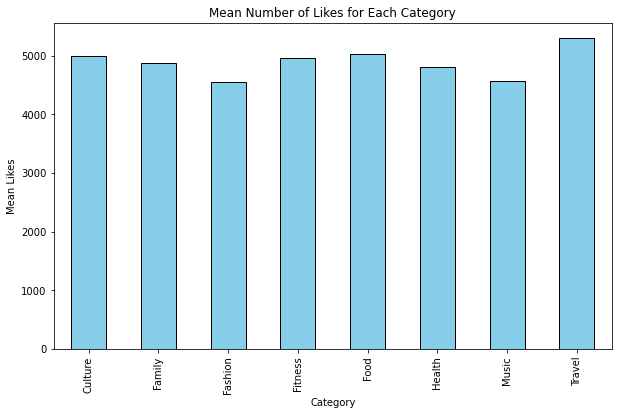

In [26]:
# Print the mean of 'Likes'all together & for each 'Category'
mean_likes = df['Likes'].mean()
print("Mean Likes = ", mean_likes)
mean_likes_category = df.groupby('Category')['Likes'].mean()
print("\nMean 'Likes' for each 'Category':")
print(mean_likes_category)
plt.figure(figsize=(10, 6))
mean_likes_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Number of Likes for Each Category')
plt.xlabel('Category')
plt.ylabel('Mean Likes')
plt.show()

Conclusion

    The analysis of the mean 'Likes' for each category showed considerable variations, indicating that some are more popular than others. The most popular categories were identified by calculating the average & total number of "Likes" for every category. Here, travel is more popular than others from the statistical analysis of the randomly generated data.
    The study offered insightful information on how engaged certain categories were with the social media network. Future tactics for content generation and optimization can benefit from these findings.